In [1]:
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
%matplotlib inline

Load the schema used to build our environment

In [5]:
dataset_name = 'citylearn_challenge_2022_phase_1' #only action is electrical storage
schema = DataSet.get_schema(dataset_name)

Build an unwrapped environment with a single building, same as our training environment

In [6]:
env = CityLearnEnv(schema, buildings=['Building_1'])

In [7]:
df_observations = pd.DataFrame({'max_obs':env.observation_space[0].high, 'min_obs':env.observation_space[0].low }, 
                               index=env.observation_names[0])

We'll ignore the calendar features since those won't be perturbed in our experiments

In [8]:
calendar_features = ['month', 'day_type', 'hour']
df_observations = df_observations.drop(calendar_features)

We can de-normalize observations by multiplying them by the spreads, then adding the minimums

In [9]:
df_observations['spread'] = df_observations['max_obs'] - df_observations['min_obs']

In [10]:
df_observations

,max_obs,min_obs,spread
outdoor_dry_bulb_temperature,32.200001,5.600000,26.600000
outdoor_dry_bulb_temperature_predicted_6h,32.200001,5.600000,26.600000
outdoor_dry_bulb_temperature_predicted_12h,32.200001,5.600000,26.600000
outdoor_dry_bulb_temperature_predicted_24h,32.200001,5.600000,26.600000
outdoor_relative_humidity,100.000000,10.000000,90.000000
outdoor_relative_humidity_predicted_6h,100.000000,10.000000,90.000000
outdoor_relative_humidity_predicted_12h,100.000000,10.000000,90.000000
outdoor_relative_humidity_predicted_24h,100.000000,10.000000,90.000000
diffuse_solar_irradiance,1017.000000,0.000000,1017.000000
diffuse_solar_irradiance_predicted_6h,1017.000000,0.000000,1017.000000


In [11]:
#DataSet.copy(dataset_name, f'./{dataset_name}') #don't do this every time

In [12]:
df_weather = pd.read_csv(f'./{dataset_name}/weather.csv')
df_weather.head()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


<Axes: >

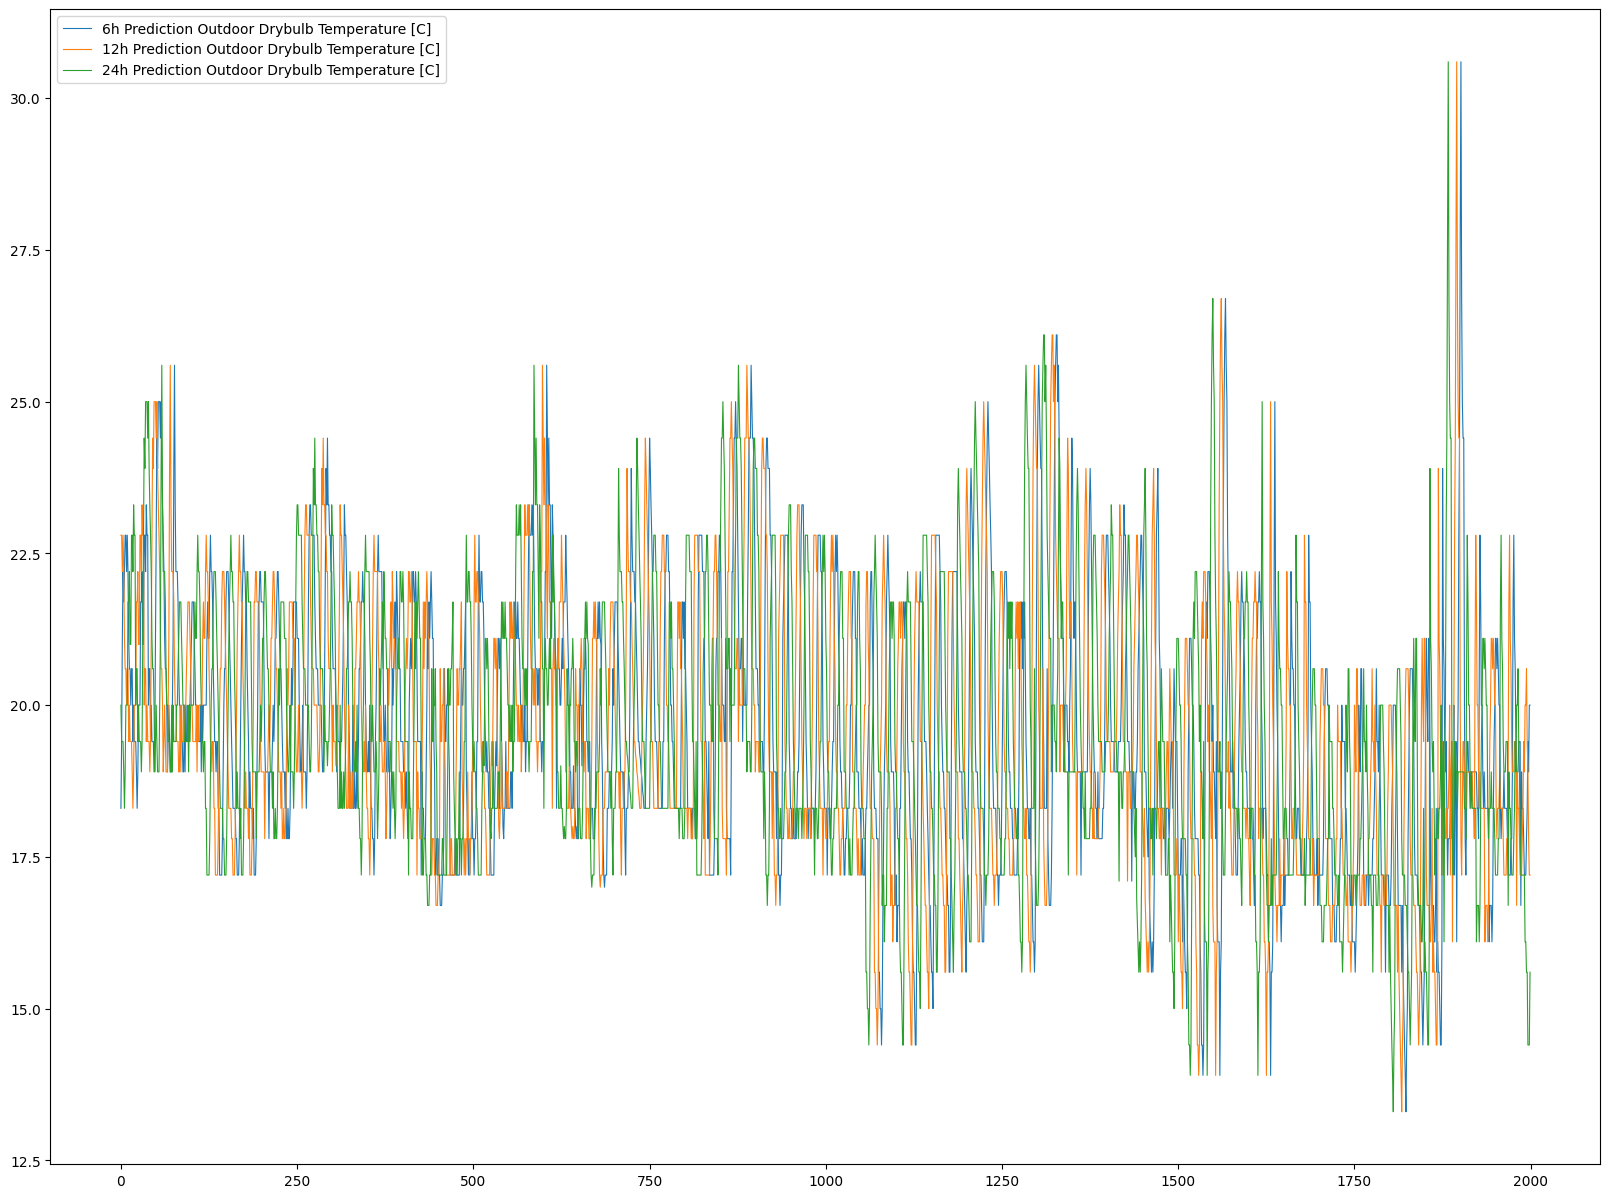

In [34]:
mask = df_weather.columns.str.contains('Temperature') & df_weather.columns.str.contains('Prediction')
df_weather.loc[:,mask][:2000].plot.line(figsize=(20,15), lw=0.8)


Make a line plot

<Axes: >

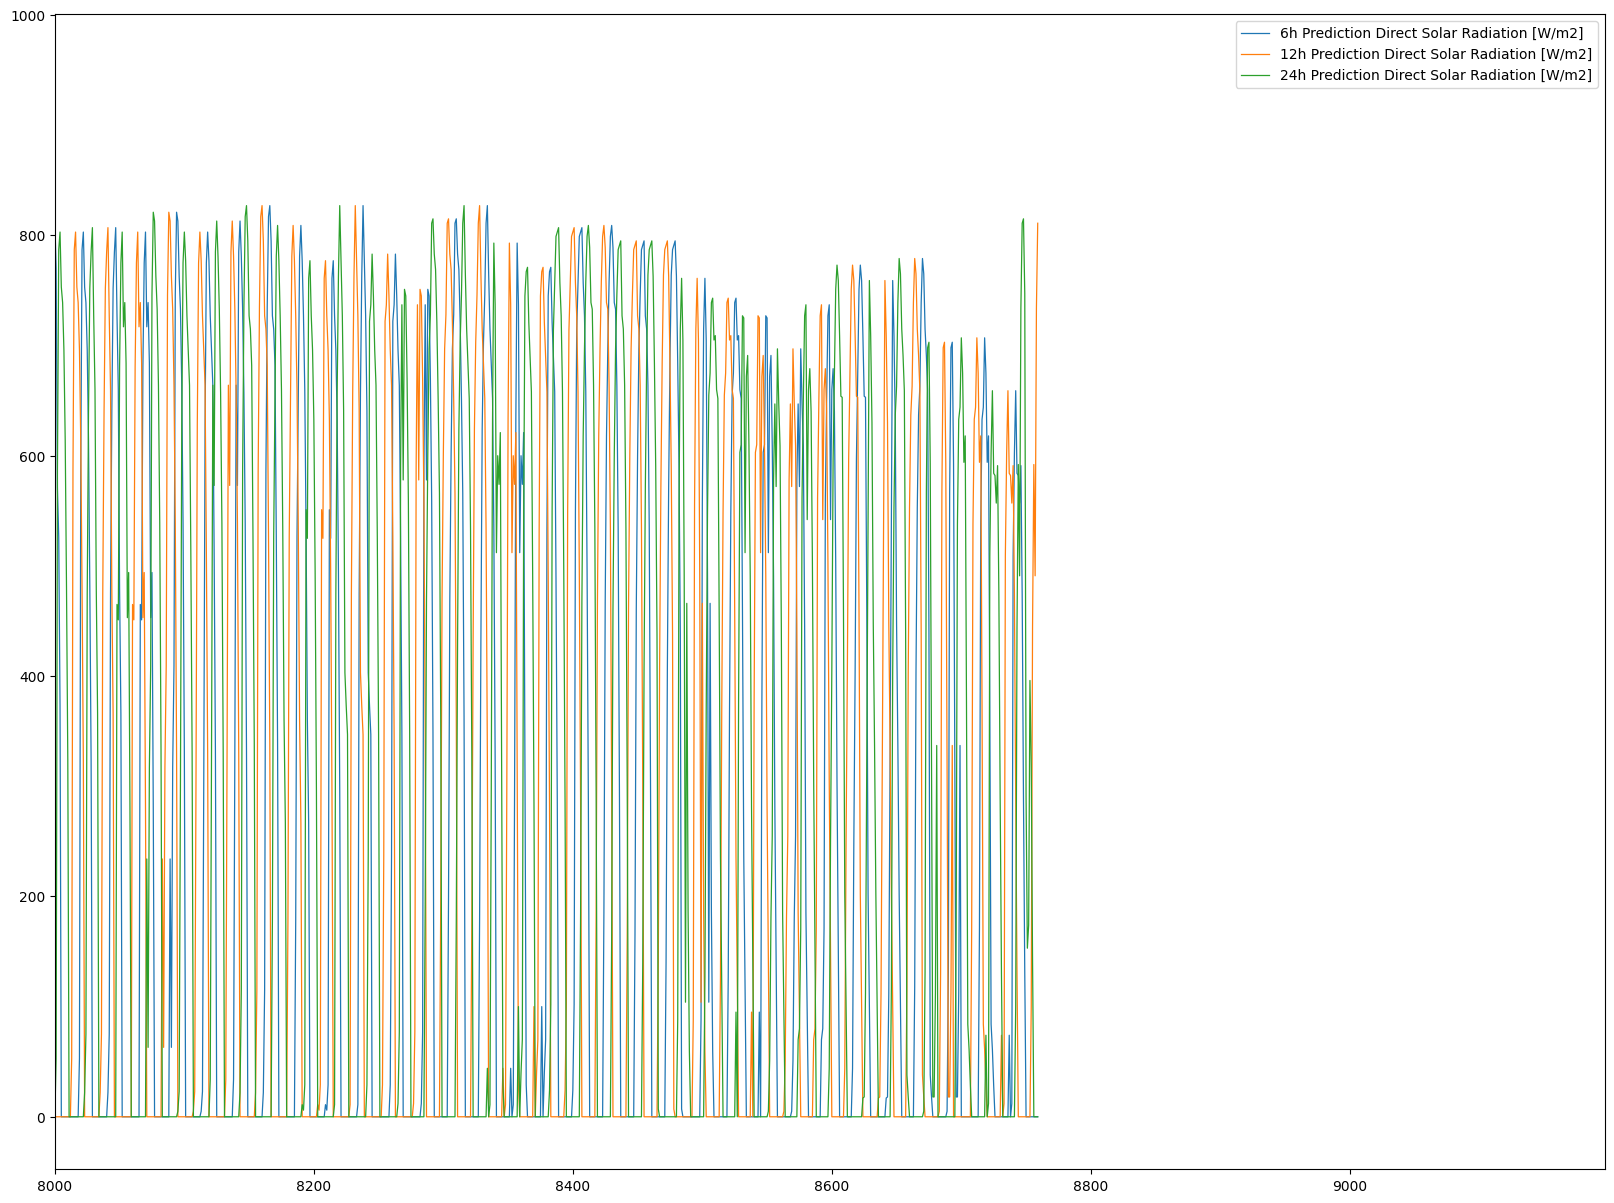

In [31]:
mask = df_weather.columns.str.contains('Direct') & df_weather.columns.str.contains('Prediction')
df_weather.loc[:,mask].plot.line(figsize=(20,15), lw=0.9, xlim=8000)

<Axes: >

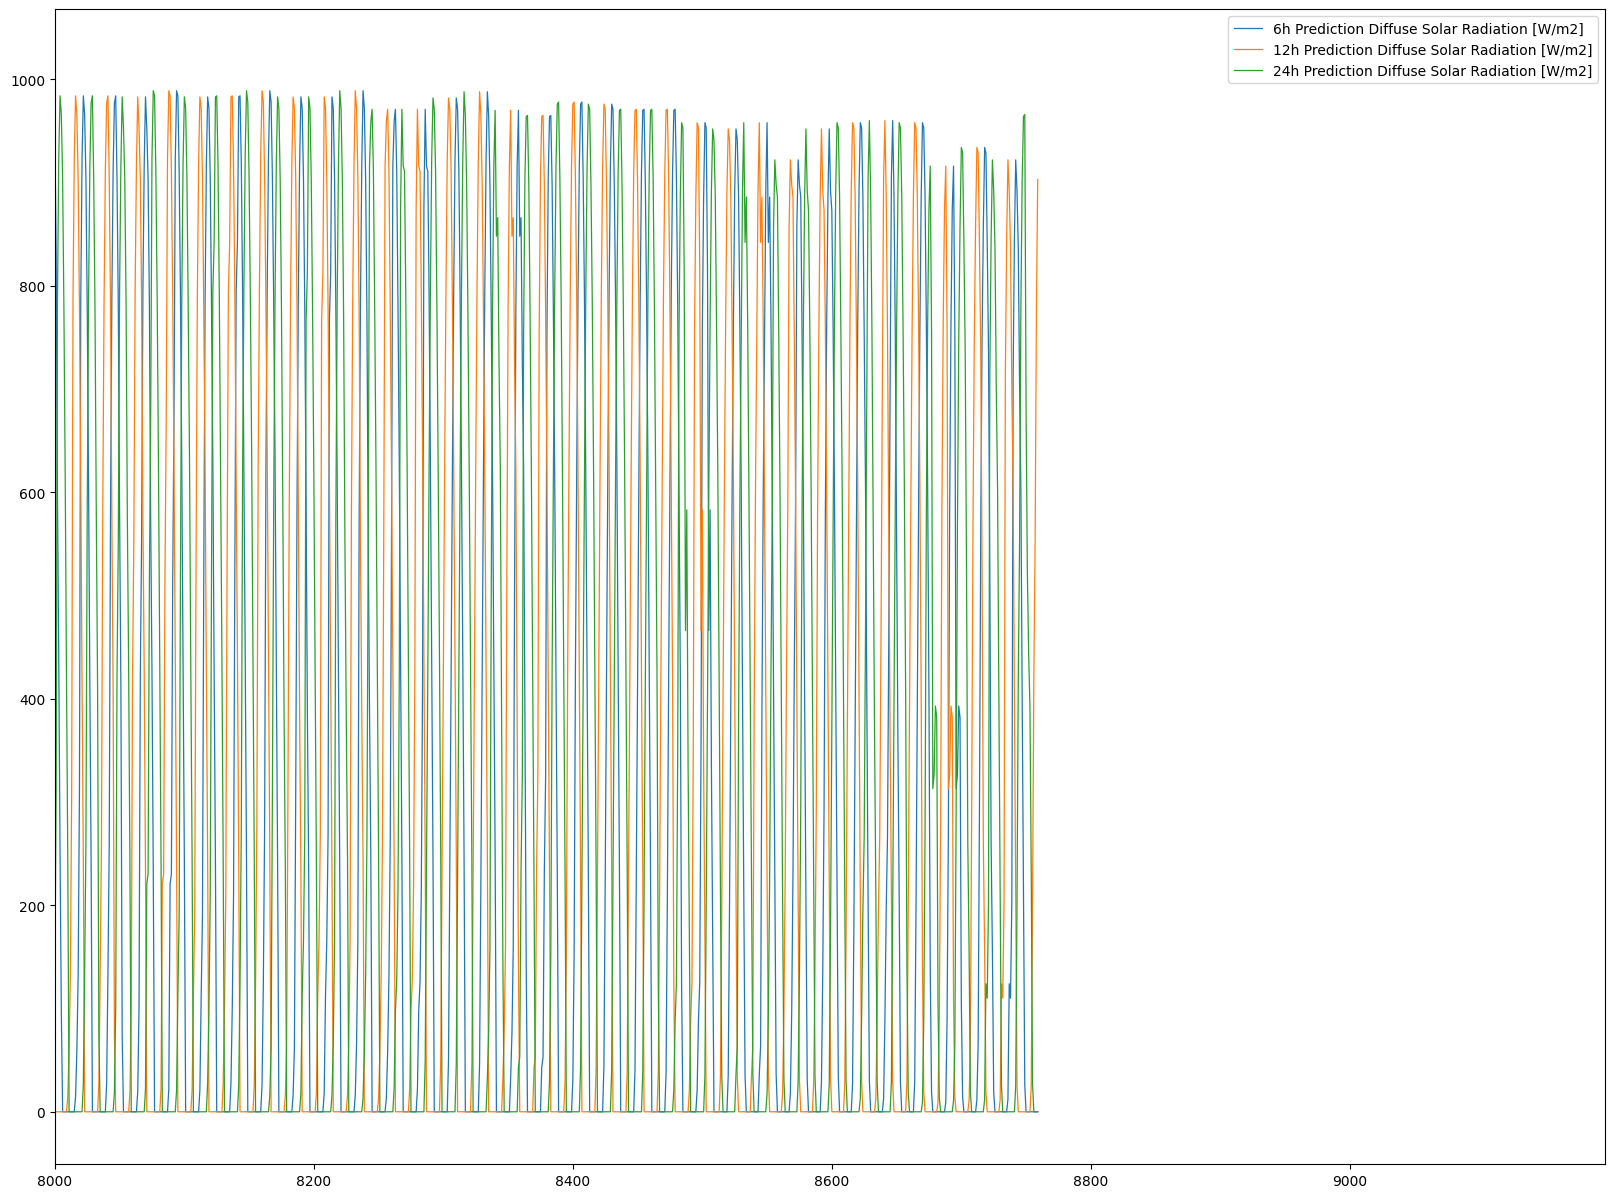

In [33]:
mask = df_weather.columns.str.contains('Diffuse') & df_weather.columns.str.contains('Prediction')
df_weather.loc[:,mask].plot.line(figsize=(20,15), lw=0.9, xlim=8000)